In [59]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
data = pd.read_csv(r'D:\Projects\FYP prototype\ver 1.0\GPU\Mergers\base_fps_IM.csv')
data

,chipset,core_clock,boost_clock,memory_clock,memory,memory_ver,bus_width,shaders,TMUs,ROPs,PCIe,TDP,rec_psu,detail_URL,1080p perf (FPS),1440p perf (FPS),4k perf (FPS),overall FPS performance
0,GeForce RTX 3060,1320,1777,1875,8.0,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,124.0,92.0,55.0,90.33
1,GeForce RTX 4070,1920,2490,1313,12.0,6,192,5888,184,64,PCIe 4.0 x16,200,550 W,https://www.techpowerup.com/gpu-specs/geforce-...,295.0,225.0,141.0,220.33
2,GeForce RTX 4090,2235,2640,1313,24.0,6,384,16384,512,176,PCIe 4.0 x16,450,850 W,https://www.techpowerup.com/gpu-specs/geforce-...,369.0,281.0,176.0,275.33
3,Radeon RX 6800 XT,1825,2250,2000,16.0,6,256,4608,288,128,PCIe 4.0 x16,300,700 W,https://www.techpowerup.com/gpu-specs/radeon-r...,236.0,176.0,100.0,170.67
4,Radeon RX 6700 XT,2321,2321,2000,12.0,6,192,2560,160,64,PCIe 4.0 x16,230,550 W,https://www.techpowerup.com/gpu-specs/radeon-r...,163.0,122.0,70.0,118.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Radeon R9 285,918,965,1375,2.0,5,256,1792,112,32,PCIe 3.0 x16,190,450 W,https://www.techpowerup.com/gpu-specs/radeon-r...,39.0,28.0,16.0,27.67
99,Radeon HD 6870,900,900,1050,1.0,5,256,1120,56,32,PCIe 2.0 x16,151,450 W,https://www.techpowerup.com/gpu-specs/radeon-h...,28.0,14.0,9.0,17.00
100,Radeon HD 7970 GHz Edition,1000,1000,1500,3.0,5,384,2048,128,32,PCIe 3.0 x16,300,700 W,https://www.techpowerup.com/gpu-specs/radeon-h...,59.0,42.0,19.0,40.00
101,Radeon R9 Nano,1000,1000,500,4.0,4,4096,4096,256,64,PCIe 3.0 x16,175,450 W,https://www.techpowerup.com/gpu-specs/radeon-r...,71.0,53.0,32.0,52.00


In [12]:
from scipy import stats

In [14]:
z_scores = np.abs(stats.zscore(data['overall FPS performance']))
threshold = 3  # Typically, a threshold of 3 is used
data = data[z_scores < threshold]


In [61]:
#CSV file has columns 'X' and 'y' for features and target
X = data[['boost_clock', 'memory_ver', 'bus_width', 'shaders', 'TMUs', 'ROPs']]
y = data['overall FPS performance']
#y = data['G3Dmark']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

In [63]:
model = SVR(kernel="linear" ,gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 83.62292655136942


In [45]:
#Create and train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 155.53087222761914


In [44]:
#Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 161.76644183162614


In [49]:
#Create and train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 133.84104319273482


In [47]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 161.3790530598827


In [48]:
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet regression model with regularization parameters alpha and l1_ratio
model = ElasticNet(alpha=0.01, l1_ratio=0.9)  # alpha is the overall regularization strength, l1_ratio controls the balance between L1 and L2 regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 161.7016914714943


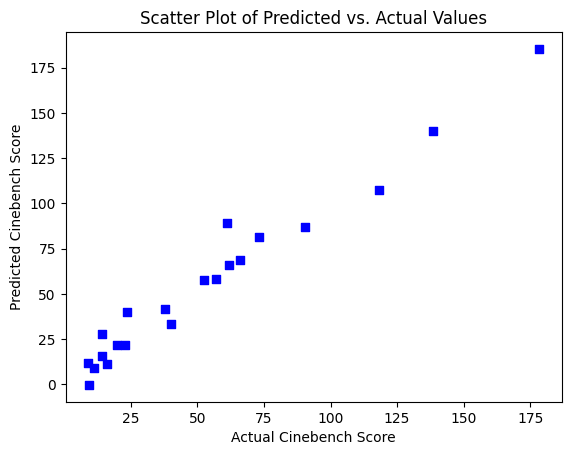

In [64]:
ax = plt.figure().add_subplot(111)

ax.scatter(y_test, y_pred, c='b', marker='s')
plt.xlabel("Actual Cinebench Score")
plt.ylabel("Predicted Cinebench Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

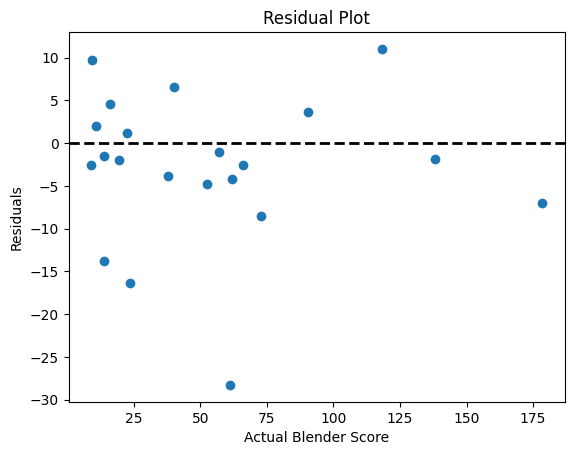

In [65]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Blender Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [57]:
from sklearn.model_selection import learning_curve

In [58]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [66]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'fps_predictor.pkl')